In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Math
from matplotlib.colors import ListedColormap
from ml.data import create_lineal_data, create_sinusoidal_data, create_classification_data
from ml.features import polynomial_features
from ml.perceptron import perceptron
from ml.regression import linear_least_squares
from ml.visualization import perceptron_boundary

%matplotlib inline

# Regresión

## Regresión lineal

### Generación de datos

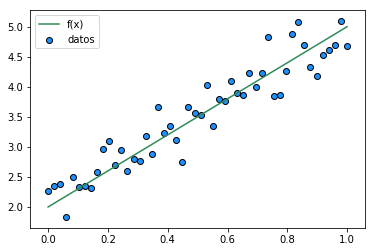

In [2]:
slope = 3
bias = 2

X, y = create_lineal_data(slope, bias, 0.25)
_, f_x = create_lineal_data(slope, bias, 0)

plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X, f_x, color="seagreen", label="f(x)")
plt.legend()
plt.show()

### Aplicación de cuadrados mínimos para resolución

In [3]:
X_b = np.c_[np.ones(X.shape[0]), X]  # Agregar el vector de bias a los ejemplos (bias trick)

# Cálculo de w usando método de cuadrados mínimos
w = linear_least_squares(X_b, y)

display(Math(r"\text{Valores de w: } w_{0} = %.2f - w_{1} = %.2f" % (w[0], w[1])))

<IPython.core.display.Math object>

### Visualización

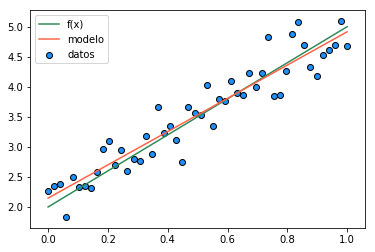

In [4]:
plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X, f_x, color="seagreen", label="f(x)")
plt.plot(X, X_b.dot(w), color="tomato", label="modelo")
plt.legend()
plt.show()

## Regresión Polinomial

### Generación de datos

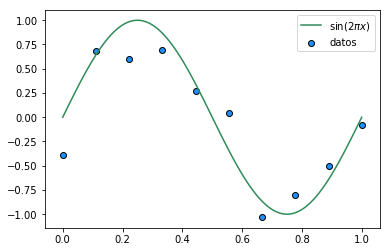

In [5]:
X, y = create_sinusoidal_data(0.25, 10)
X_sin, f_x_sin = create_sinusoidal_data(0, 100)

plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Resolución sin regularización

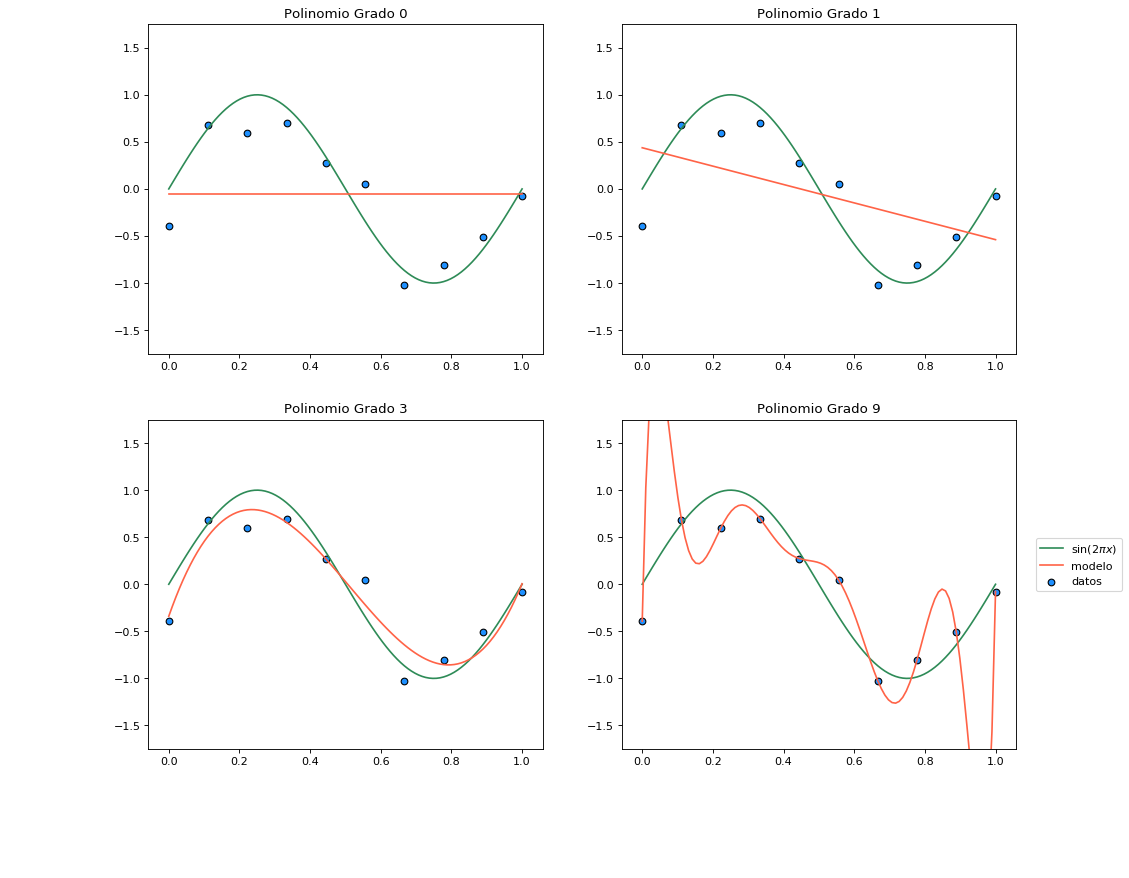

In [6]:
plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')

for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    X_poly = polynomial_features(X, degree)
    X_sin_poly = polynomial_features(X_sin, degree)

    w = linear_least_squares(X_poly, y)

    plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
    plt.plot(X_sin, X_sin_poly.dot(w), color="tomato", label="modelo")
    plt.ylim(-1.75, 1.75)
    plt.title("Polinomio Grado %d" % degree)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### Regularizando

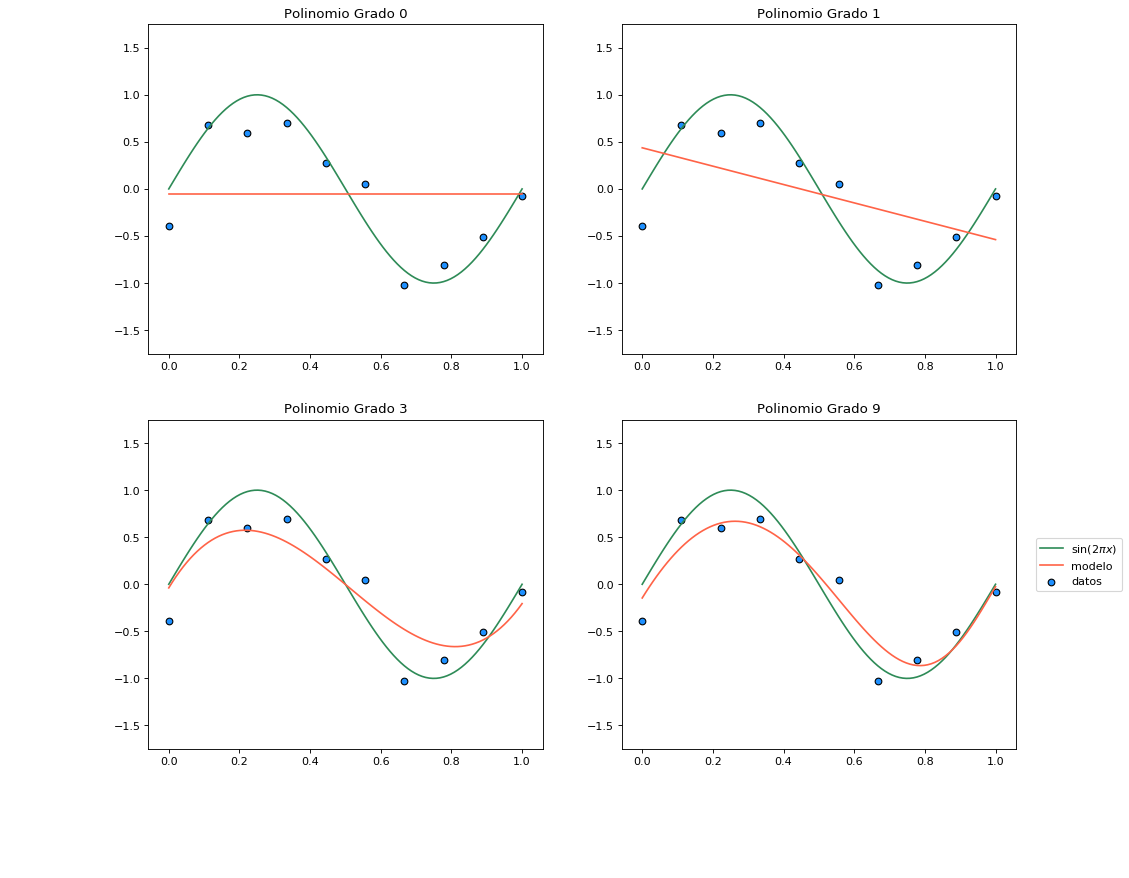

In [7]:
plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')

for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    X_poly = polynomial_features(X, degree)
    X_sin_poly = polynomial_features(X_sin, degree)

    w = linear_least_squares(X_poly, y, lamda=0.001)
    y_hat = X_poly.dot(w)

    plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
    plt.plot(X_sin, X_sin_poly.dot(w), color="tomato", label="modelo")
    plt.ylim(-1.75, 1.75)
    plt.title("Polinomio Grado %d" % degree)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# Clasificación

## Perceptrón

### Generación de datos lineales

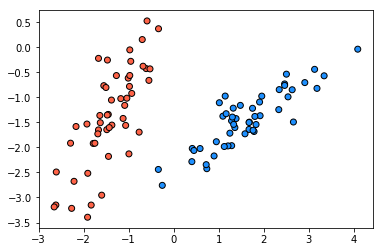

In [8]:
X, y = create_classification_data("lineal")

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dots, edgecolors='k')
plt.show()

### Resolución

In [9]:
X_b = np.c_[np.ones(X.shape[0]), X]  # Agregar el vector de bias a los ejemplos (bias trick)

w = perceptron(X_b, y)

y_pred = np.sign(X_b.dot(w)).astype(np.int)  # Obtenemos las predicciones (como -1 o 1)

accuracy = (y == y_pred).astype(np.int).sum() / y.shape[0]  # Calcular la exactitud

print("Exactitud del algoritmo: %.2f" % accuracy)

Exactitud del algoritmo: 1.00


### Frontera de decisión

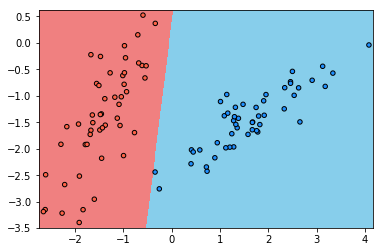

In [10]:
xx, yy, Z = perceptron_boundary(X, y)

cmap_back = ListedColormap(['lightcoral', 'skyblue'])

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Generación de datos no lineales

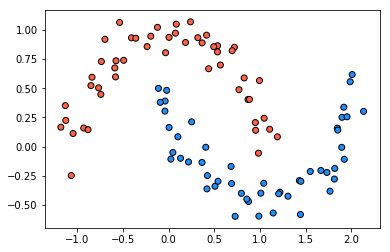

In [11]:
X, y = create_classification_data("nonlineal")

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dots, edgecolors='k')
plt.show()

### Resolución

In [12]:
X_b = np.c_[np.ones(X.shape[0]), X]  # Agregar el vector de bias a los ejemplos (bias trick)

w = perceptron(X_b, y)

y_pred = np.sign(X_b.dot(w)).astype(np.int)  # Obtenemos las predicciones (como -1 o 1)

accuracy = (y == y_pred).astype(np.int).sum() / y.shape[0]  # Calcular la exactitud

print("Exactitud del algoritmo: %.2f" % accuracy)

Exactitud del algoritmo: 0.79


### Frontera de decisión

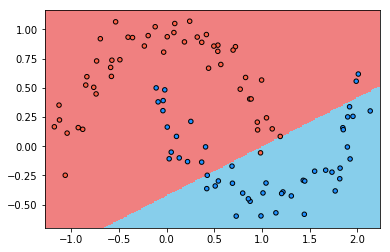

In [13]:
xx, yy, Z = perceptron_boundary(X, y)

cmap_back = ListedColormap(['lightcoral', 'skyblue'])

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()